<a href="https://colab.research.google.com/github/Kayla-afk/Tugas-Kuliah-D4-Sains-Data-Terapan/blob/main/DM_M3_3324600023_Kayla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Latihan Pertemuan 3
Data Mining | Imputasi Data; Dataset Hepatitis

In [2]:
#1. Load dan tampilkan dataset
import pandas as pd
dataset = pd.read_excel('/content/Hepatitis.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                155 non-null    float64
 1   Age              155 non-null    float64
 2   Sex              155 non-null    object 
 3   Steroid          155 non-null    object 
 4   Antivirals       155 non-null    object 
 5   Fatique          155 non-null    object 
 6   Malaise          155 non-null    object 
 7   Anorexia         159 non-null    object 
 8   Liver Big        164 non-null    object 
 9   Liver Firm       164 non-null    object 
 10  Spleen Palpable  155 non-null    object 
 11  Speiders         155 non-null    object 
 12  Ascites          155 non-null    object 
 13  Varices          155 non-null    object 
 14  Bilirubin        155 non-null    object 
 15  Alk Phosphate    155 non-null    object 
 16  SGOT             155 non-null    object 
 17  Albumin         

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
import numpy as np
dataset.replace("?", np.nan, inplace=True)

/tmp/ipython-input-574/3754093368.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace("?", np.nan, inplace=True)


In [6]:
cols_numeric_should_be = [
    "Bilirubin",
    "Alk Phosphate",
    "SGOT",
    "Albumin",
    "Protime"
]
for col in cols_numeric_should_be:
  dataset[col] = pd.to_numeric(dataset[col])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                155 non-null    float64
 1   Age              155 non-null    float64
 2   Sex              155 non-null    object 
 3   Steroid          154 non-null    object 
 4   Antivirals       155 non-null    object 
 5   Fatique          154 non-null    object 
 6   Malaise          154 non-null    object 
 7   Anorexia         158 non-null    object 
 8   Liver Big        154 non-null    object 
 9   Liver Firm       153 non-null    object 
 10  Spleen Palpable  150 non-null    object 
 11  Speiders         150 non-null    object 
 12  Ascites          150 non-null    object 
 13  Varices          150 non-null    object 
 14  Bilirubin        149 non-null    float64
 15  Alk Phosphate    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  Albumin         

In [9]:
#2. Ambil dataset kolom selain CLASS dan tampilkan
data = dataset.drop(columns=["CLASS"])
data.head()

,#,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Speiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology
0,1.0,30.0,female,no,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,1.0,85.0,18.0,4.0,NaN,no
1,2.0,50.0,male,no,yes,no,yes,yes,no,yes,yes,yes,yes,yes,0.9,135.0,42.0,3.5,NaN,no
2,3.0,78.0,male,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,0.7,96.0,32.0,4.0,NaN,no
3,4.0,31.0,male,NaN,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,0.7,46.0,52.0,4.0,80.0,no
4,5.0,34.0,male,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,1.0,NaN,200.0,4.0,NaN,no


In [10]:
#3. Ambil dataset kolom CLASS
kelas = dataset["CLASS"]
kelas.head()

,CLASS
0,Live
1,Live
2,Live
3,Live
4,Live


In [15]:
#4. Mengisi missing value pada fitur bertipe numerik dengan mean masing-masing CLASS
dataset = dataset.dropna(subset=["CLASS"])
dataset["CLASS"].isnull().sum()
numerical_cols = dataset.select_dtypes(include=["float64"]).columns
numerical_cols = numerical_cols.drop("#")
numerical_cols

Index(['Age', 'Bilirubin', 'Alk Phosphate', 'SGOT', 'Albumin', 'Protime'], dtype='object')

In [16]:
for col in numerical_cols:
  dataset[col] = dataset.groupby("CLASS")[col]\
                        .transform(lambda x: x.fillna(x.mean()))

/tmp/ipython-input-574/1816986939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset.groupby("CLASS")[col]\
/tmp/ipython-input-574/1816986939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset.groupby("CLASS")[col]\
/tmp/ipython-input-574/1816986939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [17]:
dataset[numerical_cols].isnull().sum()

,0
Age,0
Bilirubin,0
Alk Phosphate,0
SGOT,0
Albumin,0
Protime,0


In [26]:
#5. Mengisi missing value pada fitur bertipe kategorikal dengan modus masing-masing CLASS
categorical_cols = dataset.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols.drop("CLASS")

categorical_cols

Index(['Sex'], dtype='object')

In [27]:
dataset["Sex"].isnull().sum()

np.int64(0)

In [28]:
for col in categorical_cols:
    dataset[col] = dataset.groupby("CLASS")[col] \
                          .transform(lambda x: x.fillna(x.mode()[0]))

/tmp/ipython-input-574/3007478273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset.groupby("CLASS")[col] \


In [29]:
dataset[categorical_cols].isnull().sum()

,0
Sex,0


In [30]:
#6. Mentransformasi fitur dengan tipe kategori yang berisi "yes" dengan 1 dan "no" dengan 0
dataset.replace({"yes": 1, "no": 0}, inplace=True)

/tmp/ipython-input-574/1868035715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.replace({"yes": 1, "no": 0}, inplace=True)


In [31]:
dataset.head()

,#,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver Big,Liver Firm,...,Speiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology,CLASS
0,1.0,30.0,female,0,1,1,1,1,0,1,...,1,1,1,1.0,85.000000,18.0,4.0,66.571429,0,Live
1,2.0,50.0,male,0,1,0,1,1,0,1,...,1,1,1,0.9,135.000000,42.0,3.5,66.571429,0,Live
2,3.0,78.0,male,1,1,0,1,1,1,1,...,1,1,1,0.7,96.000000,32.0,4.0,66.571429,0,Live
3,4.0,31.0,male,1,0,1,1,1,1,1,...,1,1,1,0.7,46.000000,52.0,4.0,80.000000,0,Live
4,5.0,34.0,male,1,1,1,1,1,1,1,...,1,1,1,1.0,101.313725,200.0,4.0,66.571429,0,Live


HEAD DATASET


/tmp/ipython-input-574/2284236493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset.groupby("CLASS")[col].transform(lambda x: x.fillna(x.mean()))
/tmp/ipython-input-574/2284236493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset.groupby("CLASS")[col].transform(lambda x: x.fillna(x.mean()))
/tmp/ipython-input-574/2284236493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,#,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver Big,Liver Firm,...,Speiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology,CLASS
0,1.0,30.0,female,0,1,1,1,1,0,1,...,1,1,1,1.0,85.000000,18.0,4.0,66.571429,0,Live
1,2.0,50.0,male,0,1,0,1,1,0,1,...,1,1,1,0.9,135.000000,42.0,3.5,66.571429,0,Live
2,3.0,78.0,male,1,1,0,1,1,1,1,...,1,1,1,0.7,96.000000,32.0,4.0,66.571429,0,Live
3,4.0,31.0,male,1,0,1,1,1,1,1,...,1,1,1,0.7,46.000000,52.0,4.0,80.000000,0,Live
4,5.0,34.0,male,1,1,1,1,1,1,1,...,1,1,1,1.0,101.313725,200.0,4.0,66.571429,0,Live



INFO DATASET
<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                155 non-null    float64
 1   Age              155 non-null    float64
 2   Sex              155 non-null    object 
 3   Steroid          155 non-null    int64  
 4   Antivirals       155 non-null    int64  
 5   Fatique          155 non-null    int64  
 6   Malaise          155 non-null    int64  
 7   Anorexia         155 non-null    int64  
 8   Liver Big        155 non-null    int64  
 9   Liver Firm       155 non-null    int64  
 10  Spleen Palpable  155 non-null    int64  
 11  Speiders         155 non-null    int64  
 12  Ascites          155 non-null    int64  
 13  Varices          155 non-null    int64  
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    float64
 16  SGOT             155 non-null    float64
 17  Albumin

,0
#,0
Age,0
Sex,0
Steroid,0
Antivirals,0
Fatique,0
Malaise,0
Anorexia,0
Liver Big,0
Liver Firm,0


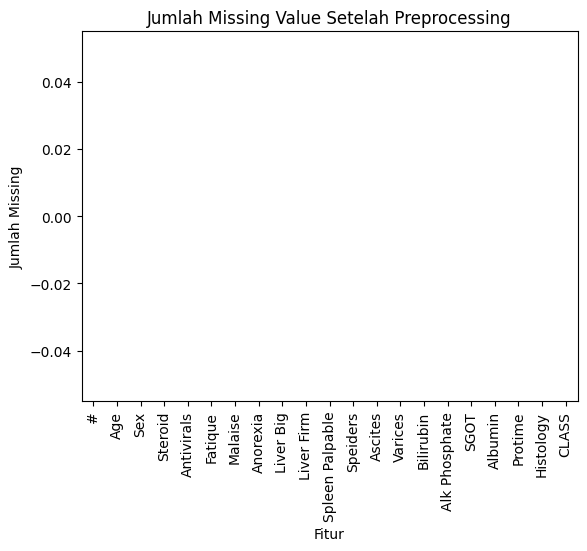

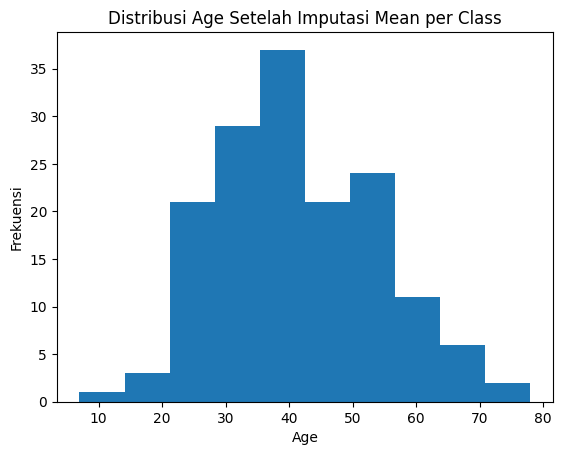

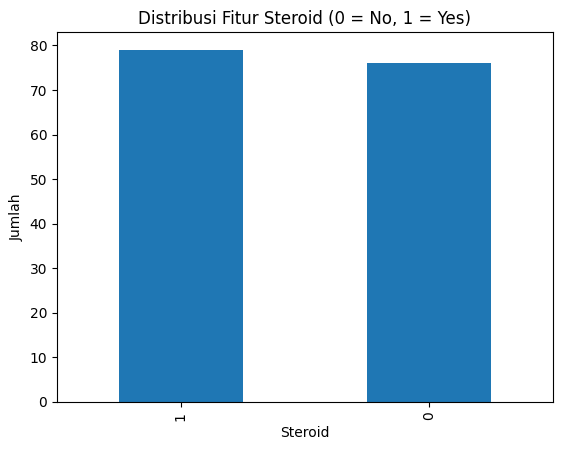

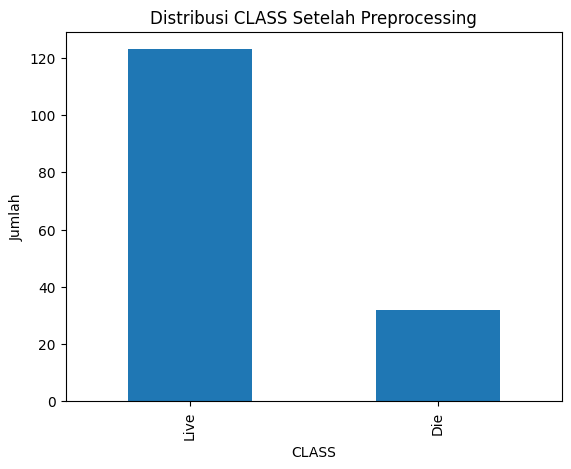

In [37]:
#7.Tampilkan hasil pre-processing dari langkah 4-6
# PREPROCESSING + VISUALISASI
# NOMOR 4: Imputasi numerik (mean per class)
numerical_cols = dataset.select_dtypes(include=["float64"]).columns
numerical_cols = numerical_cols.drop("#")

for col in numerical_cols:
    dataset[col] = dataset.groupby("CLASS")[col].transform(lambda x: x.fillna(x.mean()))

# NOMOR 5: Imputasi kategorikal (modus per class)
categorical_cols = dataset.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols.drop("CLASS")

for col in categorical_cols:
    dataset[col] = dataset.groupby("CLASS")[col].transform(lambda x: x.fillna(x.mode()[0]))

# NOMOR 6
# Transformasi yes/no → 1/0
dataset.replace({"yes":1, "no":0, "Yes":1, "No":0}, inplace=True)

# HASIL PREPROCESSING
print("HEAD DATASET")
display(dataset.head())

print("\nINFO DATASET")
dataset.info()

print("\nCEK MISSING VALUE")
display(dataset.isnull().sum())

# VISUALISASI
# Visualisasi Missing Value
import matplotlib.pyplot as plt
plt.figure()
dataset.isnull().sum().plot(kind="bar")
plt.title("Jumlah Missing Value Setelah Preprocessing")
plt.xlabel("Fitur")
plt.ylabel("Jumlah Missing")
plt.show()

# Visualisasi Distribusi Salah Satu Fitur Numerik (Age)
plt.figure()
plt.hist(dataset["Age"], bins=10)
plt.title("Distribusi Age Setelah Imputasi Mean per Class")
plt.xlabel("Age")
plt.ylabel("Frekuensi")
plt.show()

# Visualisasi Distribusi Salah Satu Fitur Yes/No (Steroid)
plt.figure()
dataset["Steroid"].value_counts().plot(kind="bar")
plt.title("Distribusi Fitur Steroid (0 = No, 1 = Yes)")
plt.xlabel("Steroid")
plt.ylabel("Jumlah")
plt.show()

# Visualisasi Distribusi CLASS
plt.figure()
dataset["CLASS"].value_counts().plot(kind="bar")
plt.title("Distribusi CLASS Setelah Preprocessing")
plt.xlabel("CLASS")
plt.ylabel("Jumlah")
plt.show()